the *discriminative* **k Nearest-Neighbors (kNN)** classifier is a simple, easy to understand, versatile, but powerful machine learning algorithm. Until recently (prior to the advent of deep learning approaches), it was used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition, e.g. in credit ratings, financial institutes used kNN to predict the solvency of customers.


# 0. LIBRARIES IMPORT

In [1]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes and k-nearest neighbor classifier library
from sklearn.neighbors import KNeighborsClassifier

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('seaborn')
# set random seed oto ensure reproducibility
random_seed = 42

<ipython-input-2-c97cdf59ea78>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. DATA PROCESSING

## a. data acquisition

Let's try the k Nearest-Neighbour algorithm using the **Wine Dataset**! It is a classic and straightforward multi-class classification dataset.

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators (types). The dataset consists in total of **178 wines** as well as their corresponding **13 different measurements** taken for different constituents found in the three types of wine:

>- `Alcohol`
>- `Malic acid`
>- `Ash`
>- `Alcalinity of ash`
>- `Magnesium`
>- `Total phenols`
>- `Flavanoids`
>- `Nonflavanoid phenols`
>- `Proanthocyanins`
>- `Color intensity`
>- `Hue`
>- `OD280/OD315 of diluted wines`
>- `CProline`



Let's load the dataset and conduct a preliminary data assessment:

In [3]:
wine = datasets.load_wine()

Print and inspect feature names of the dataset:

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print and inspect the class names of the dataset:

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Print and inspect the top 10 feature rows of the dataset:

In [6]:
pd.DataFrame(wine.data, columns=wine.feature_names).head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Determine and print the feature dimensionality of the dataset:

In [8]:
wine.data.shape

(178, 13)

Plot the data distributions of the first 5 features:

<Figure size 1000x1000 with 0 Axes>

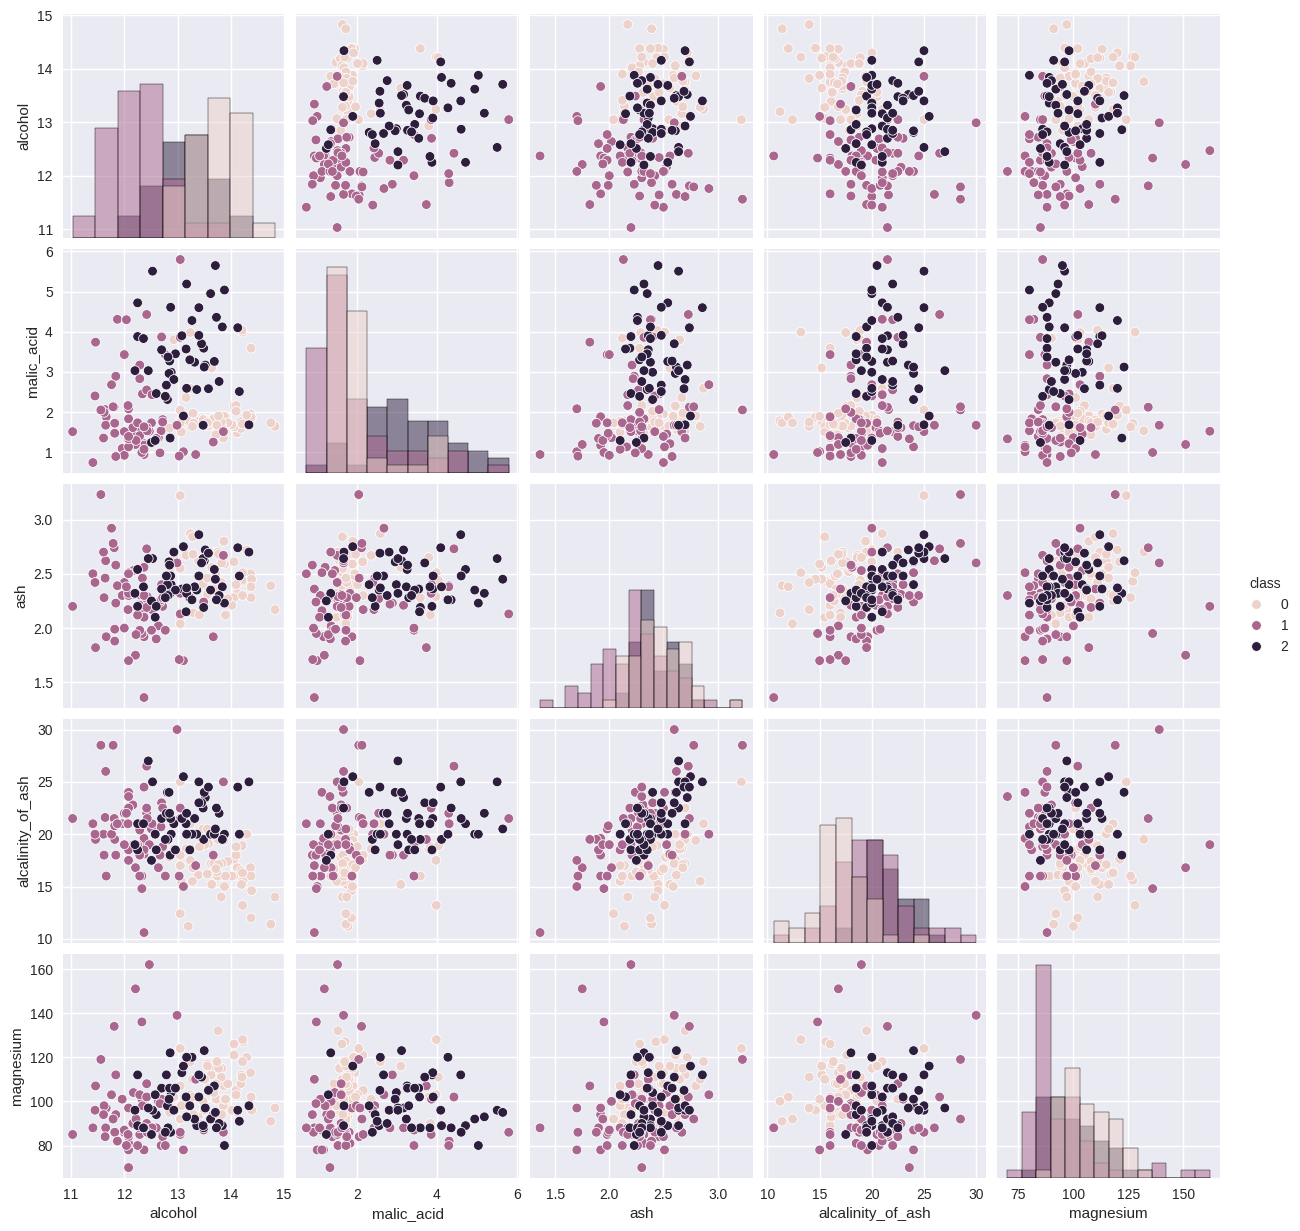

In [13]:
# init the plot
plt.figure(figsize=(10, 10))


# convert to Pandas DataFrame
wine_plot = pd.DataFrame(wine.data[:, :5], columns=wine.feature_names[:5])

# add class labels to the DataFrame
wine_plot['class'] = wine.target

# plot a pairplot of the first 5 feature distributions
sns.pairplot(wine_plot, diag_kind='hist', hue='class');

## b. preprocessing

### i. normalization

Observing the features values of the **Wine Dataset** we will notice that their respective value ranges vary widely. This results in a major challenge for distance based machine learning algorithms such as the **k Nearest-Neighbor** classifier. The **k Nearest-Neighbour** classifier calculates the distance between two observations using a distance measure such as the **Euclidean** or **Manhattan** distance.

If one of the features exhibits a wide range of values, the calculated distance will be governed by this particular feature. Therefore, the range of all features needs to be **re-scaled** or **normalized** to a value range beween in $[0,1]$ or $[-1,1]$ so that each feature contributes approximately proportionately to the final distance.

One widley used method of feature re-scaling is referred to as **Min-Max Normalization** and is given by:

$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

Let's re-scale the distinct feature values of the **Wine Dataset** using **Min-Max Normalization** using the `MinMaxScaler` class of the `sklearn` library:

In [14]:
# init the min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# min-max normalize the distinct feature values
wine_data_norm = scaler.fit_transform(wine.data)

In [ ]:
pd.DataFrame(wine_data_norm, columns=wine.feature_names).describe()

### ii. train/evaluation sets split

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Please note, the **evaluation set** will never be shown to the model as part of the training process.

We set the fraction of testing records to **30%** of the original dataset:

In [17]:
eval_fraction = 0.3

Randomly split the **Wine Dataset** into training set and evaluation set using sklearn's `train_test_split` function:

In [18]:
# 70% training and 30% evaluation
X_train, X_eval, y_train, y_eval = train_test_split(wine_data_norm, wine.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the training set dimensionality:

In [19]:
X_train.shape, y_train.shape

((124, 13), (124,))

Evaluate the evaluation set dimensionality:

In [20]:
X_eval.shape, y_eval.shape

((54, 13), (54,))

# 2. MODELING

We'll use the Python implementation of the **k Nearest-Neighbor (kNN)** classifer available in the `Scikit-Learn` library (https://scikit-learn.org).

## a. k=4

Set the number of neighbors `k` to be considered in the classification of each sample:

In [40]:
k_nearest_neighbors = 4

Two distinct distance measures to calculate the distance between an observation $x$ and it's $k$-nearest-neighbors $x'_{j}$ in a $n$-dimensonal feature space:

**Manhattan distance ("L1-norm"):** $$ D(x, x')=\|\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})\|$$

**Euclidian distance ("L2-norm"):** $$ D(x, x')=\sqrt{\sum^k_{j=1}\sum^n_{i=1}(x_{i} - x'_{j,i})^2}$$

where the index $j$ denotes the number of $k$-nearest-neighbors and the index $i$ denotes the $i$-th feature of a single nearest neighbor $x_j$. Since the 13 features of the Wine dataset consist of continuous features we will use the Euclidean distance as the distance metric in our kNN classification:

In [41]:
distance_metric = 'euclidean'

In [42]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

Train the k-NN classifier using the training dataset:

In [43]:
knn.fit(X_train, y_train);

Utilize the trained model to predict the response for the evaluation dataset:

In [44]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [45]:
print("Accuracy, k=4: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=4:  0.9629629629629629


Determine and plot the **confusion matrix** of the individual predictions:

In [46]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=4 Nearest-Neighbor** classifier:

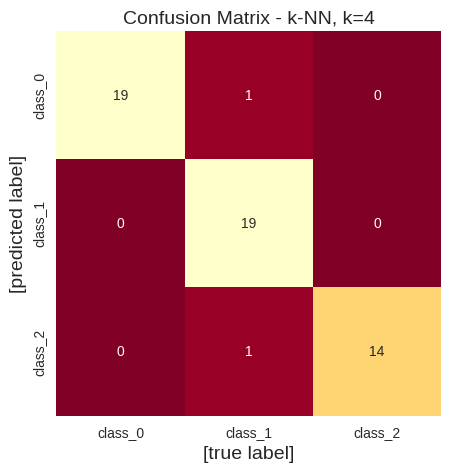

In [47]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=4', fontsize=14);

There are several measures to evaluate the quality of a retrieval system, namely **Precision**, **Recall** and **F1-Score**. Let's briefly revisit their definition and subsequently calculate those measures based on the confusion matrix above:

>- The **Precision**, denoted by Precision $=\frac{TP}{TP + FP}$, is the probability that a retrieved document is relevant.
>- The **Recall**, denoted by Recall $=\frac{TP}{TP + FN}$, is the probability that a relevant document is retrieved.
>- The **F1-Score**, denoted by F1-Score $= 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$, combines precision and recall is the harmonic mean of both measures.

In [48]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## b. k=8

Set the number of neighbors `k` to be considered in the classification of each sample:

In [49]:
k_nearest_neighbors = 8

In [50]:
knn = KNeighborsClassifier(n_neighbors=k_nearest_neighbors, metric=distance_metric)

In [51]:
knn.fit(X_train, y_train);

In [52]:
y_pred = knn.predict(X_eval)

Determine **prediction accuracy** of the trained model on the evaluation dataset:

In [53]:
print("Accuracy, k=8: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy, k=8:  0.9629629629629629


Determine and plot the **confusion matrix** of the individual predictions:

In [54]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Visualize the **confusion matrix** of the individual predictions determined by the **k=8 Nearest-Neighbor** classifier:

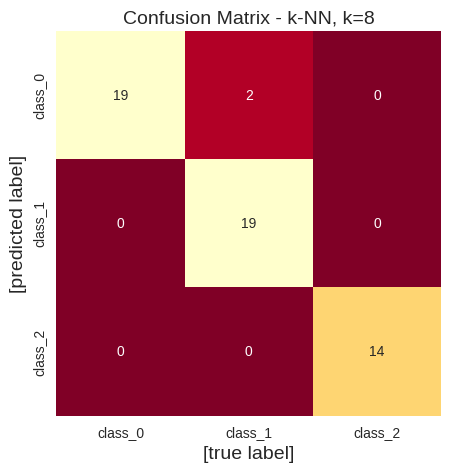

In [55]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=wine.target_names, yticklabels=wine.target_names)

# add plot axis labels
plt.xlabel('[true label]', fontsize=14)
plt.ylabel('[predicted label]', fontsize=14)

# add plot title
plt.title('Confusion Matrix - k-NN, k=8', fontsize=14);

Determine and plot a comprehensive **classification report** of the individual predictions:

In [56]:
# collect classification report
report = classification_report(y_eval, y_pred)

# print classification report
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



## c. optimal 'k'

Until now we have investigated the Euclidean distance based kNN classifer for two distinct values of $k=4$ and $k=8$. However the question remains: can we locate a value for k that yields an even higher classification accuracy?

Let's therefore investigate the classification performance of a wider range of distinct $k$ values and in particular compare the corresponding classification accuracy. We will do so in the following by specifying a range of distinct $k$ values ranging from $k=1, ..., 50$:

In [57]:
# try k=1 through k=50 to be evaluated
k_range = range(1, 51)

In [58]:
# init the distinct accuracy scores obtained on the evaluation data
eval_accuracy_scores = []

# iterate over the distinct k values
for k in k_range:

    # init the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # train the k-NN classifer on the training data
    knn.fit(X_train, y_train)

    # evaluate the k-NN classifier on the training data
    y_train_pred = knn.predict(X_train)

    # evaluate the k-NN classifier on the evaluation data
    y_eval_pred = knn.predict(X_eval)

    # determine classification accuracy
    accuracy = metrics.accuracy_score(y_eval, y_eval_pred)

    # collect the classification accuracy of the current k on the evaluation data
    eval_accuracy_scores.append(accuracy)

Visualizing the collected classification accuracy scores of the distinct $k$ values:

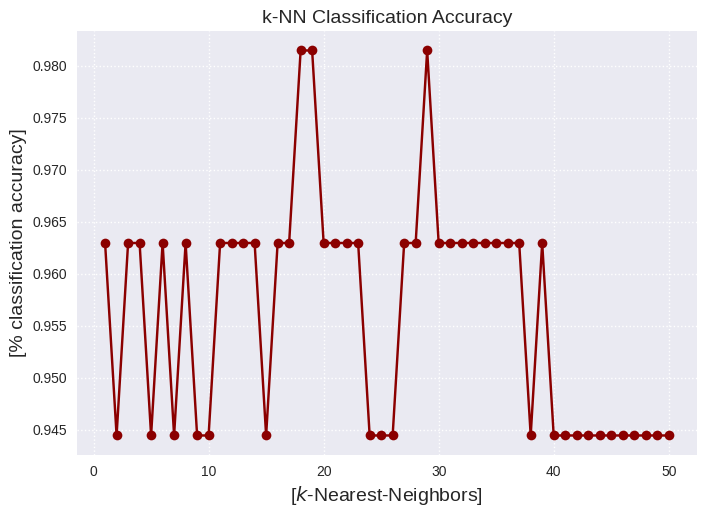

In [59]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the classification accuracy of distinct k's
ax.plot(range(1, len(eval_accuracy_scores)+1), eval_accuracy_scores, color='darkred', marker='o')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("[$k$-Nearest-Neighbors]", fontsize=14)
ax.set_ylabel("[% classification accuracy]", fontsize=14)

# add plot title
ax.set_title('k-NN Classification Accuracy', fontsize=14);

Alright, we can nicely observe that a constant high classification accuracy on the held out evaluation dataset can be achieved for $k=19, 23,$ and $29$. This is probably the $k$ value that you may want to use for inferencing and rolling to model out to production.